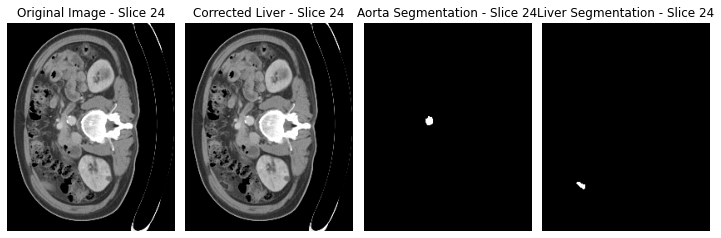

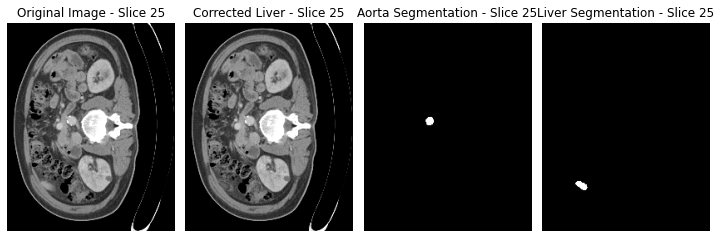

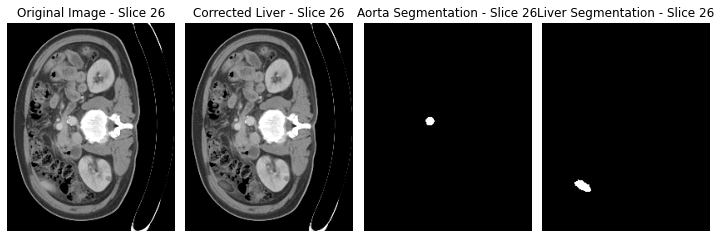

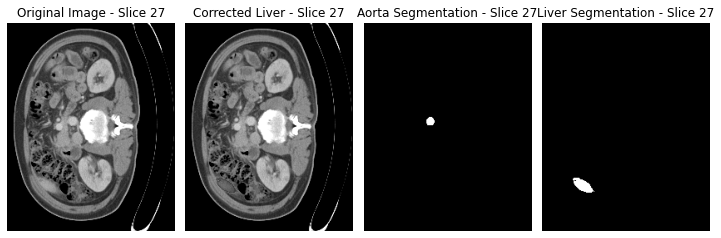

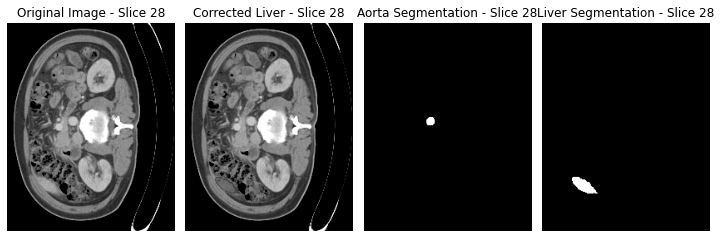

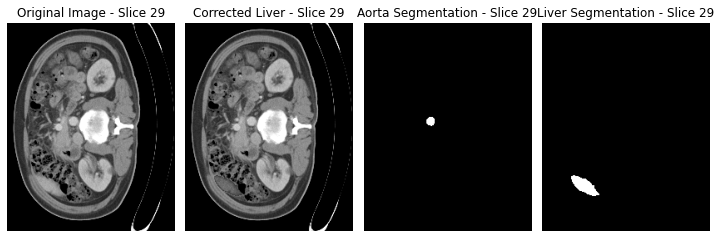

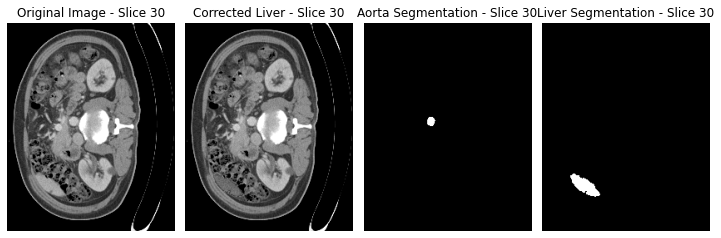

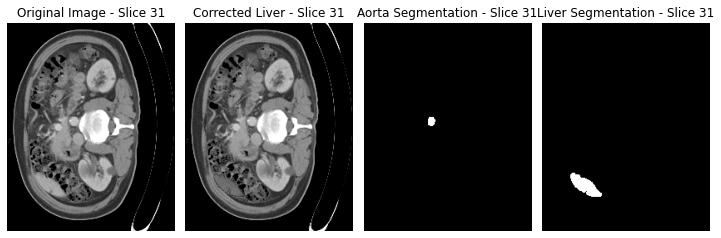

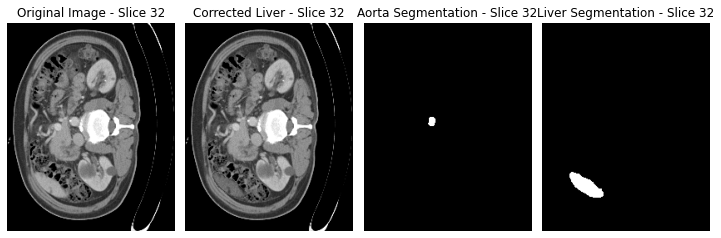

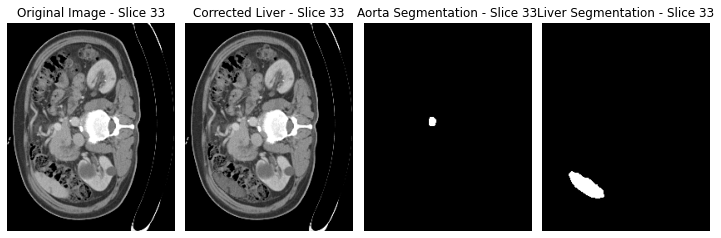

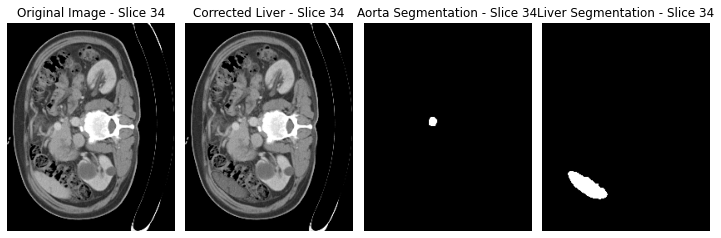

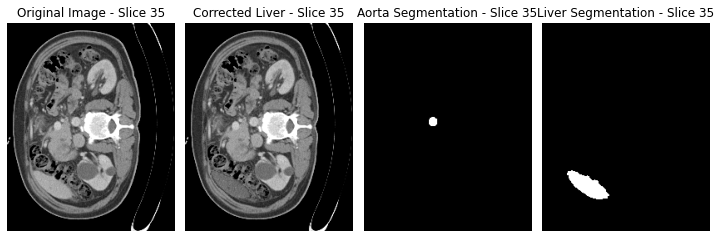

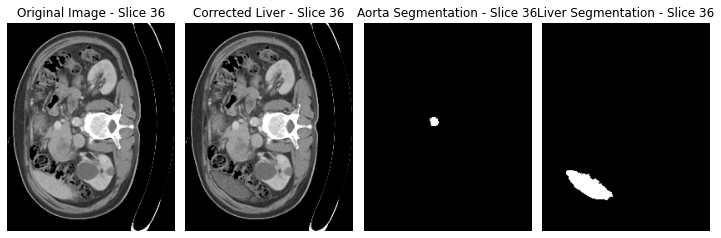

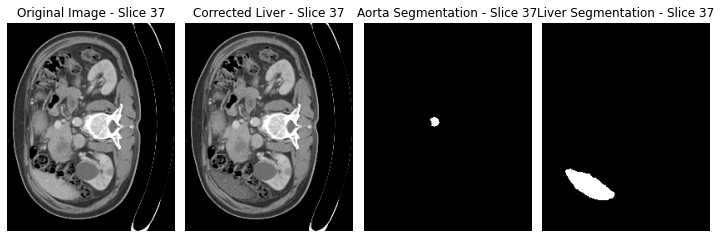

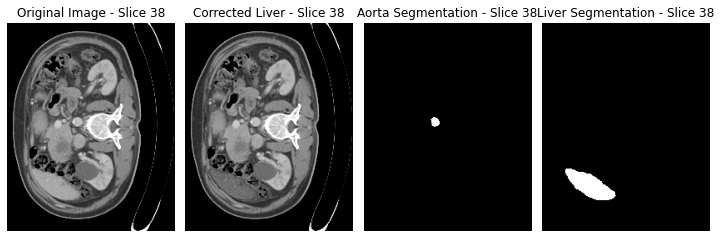

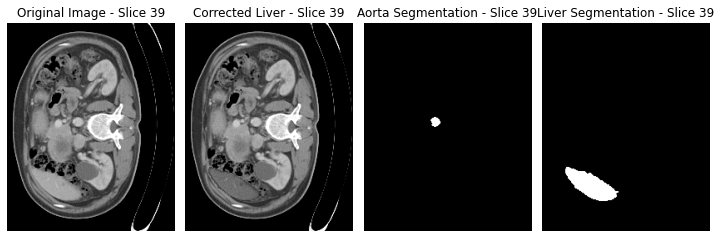

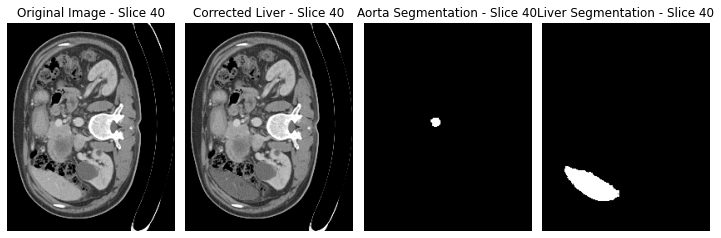

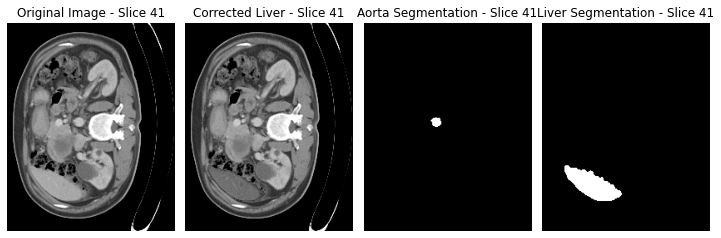

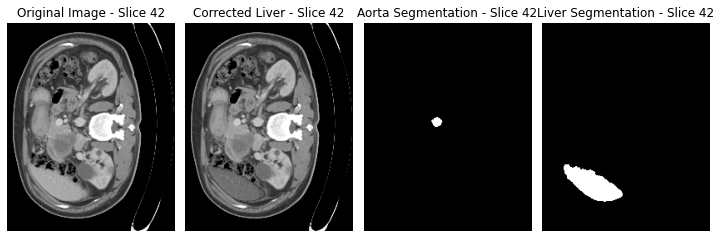

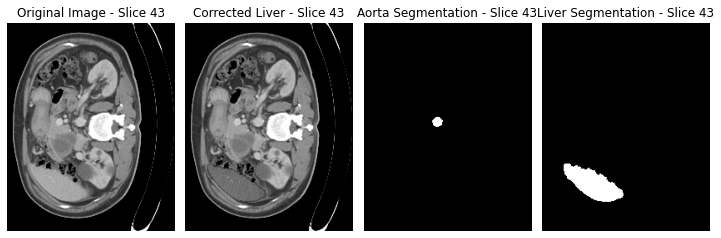

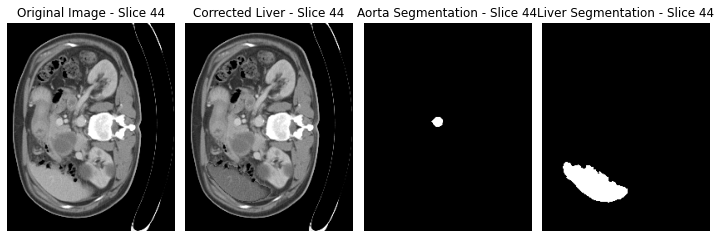

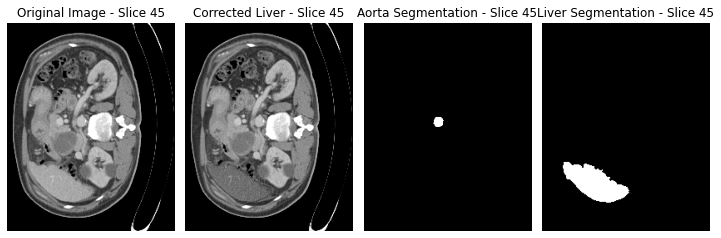

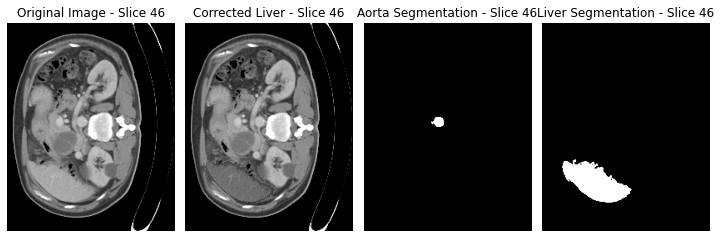

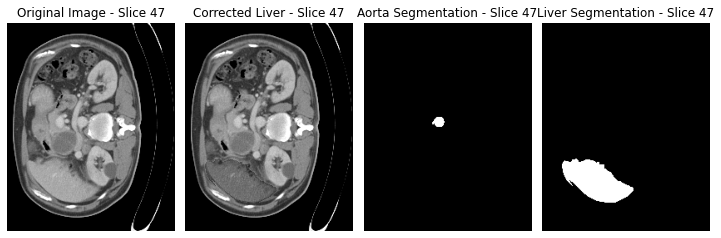

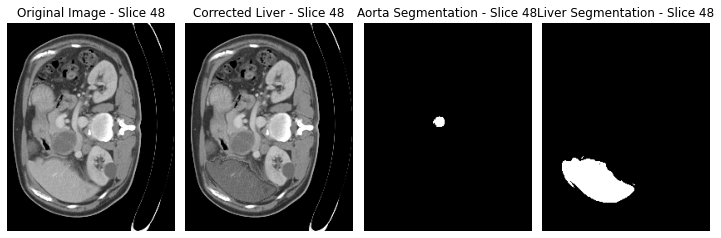

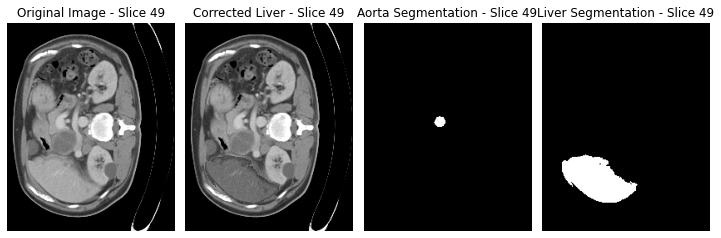

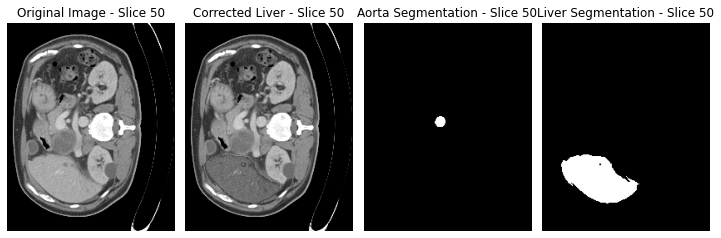

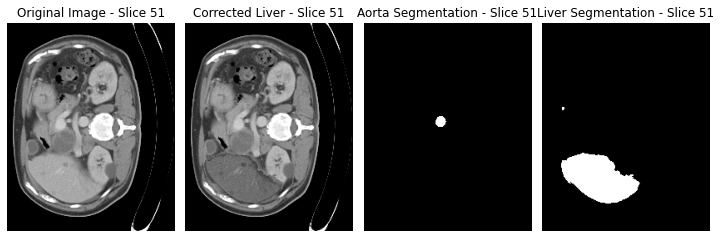

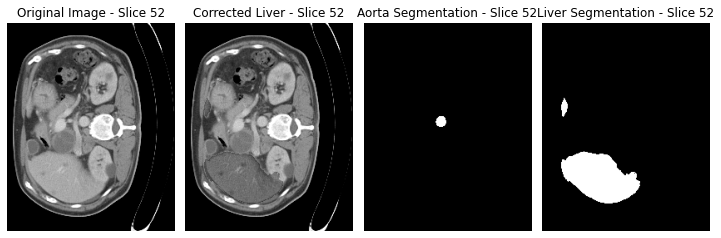

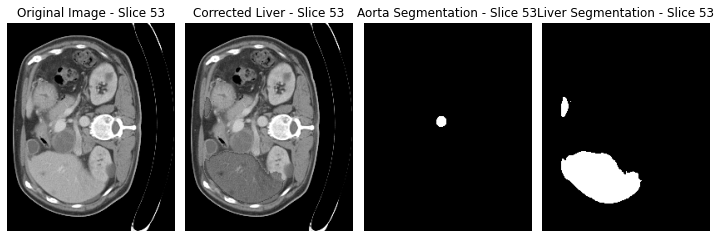

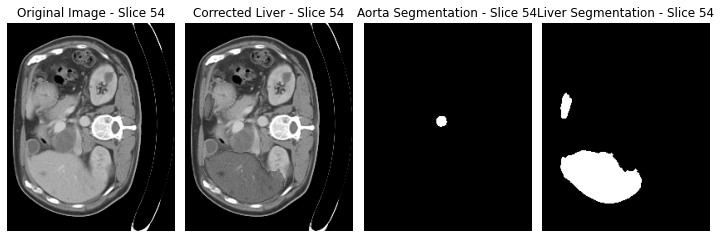

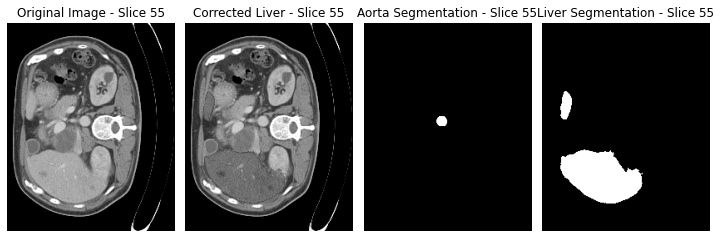

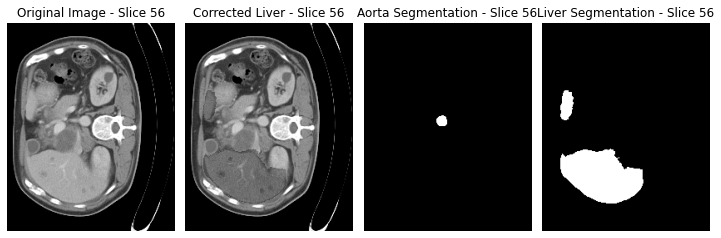

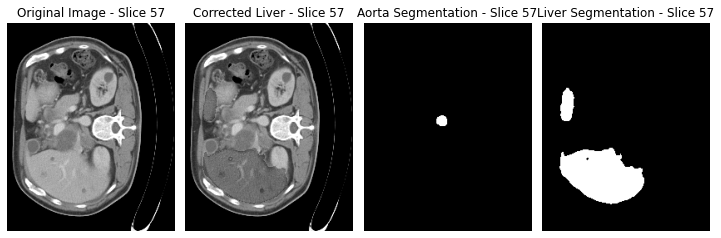

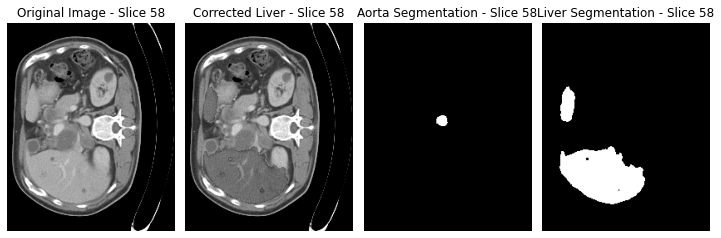

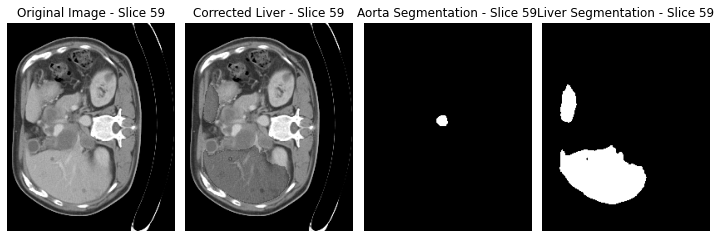

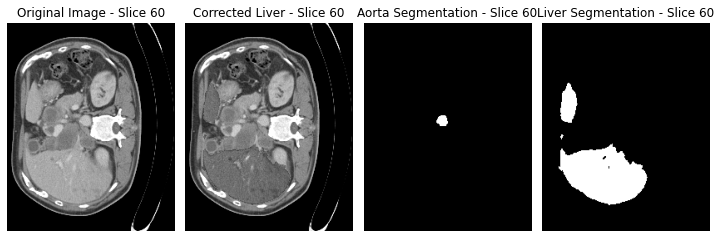

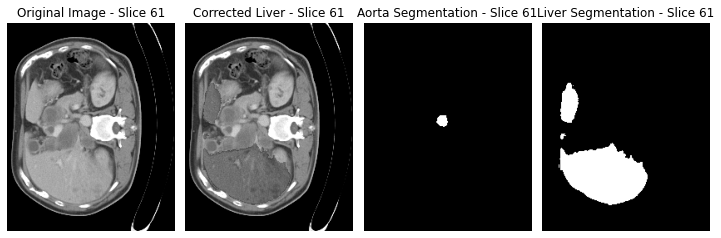

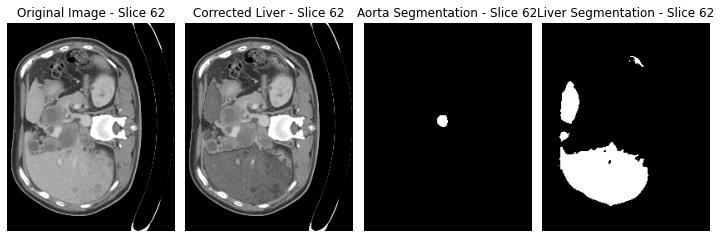

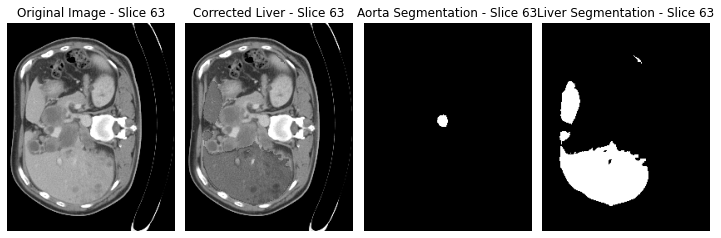

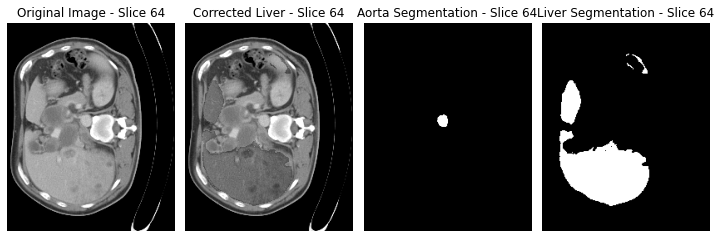

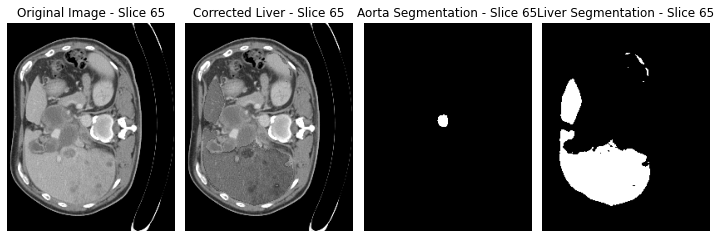

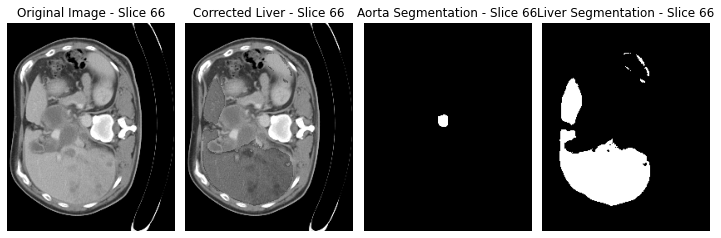

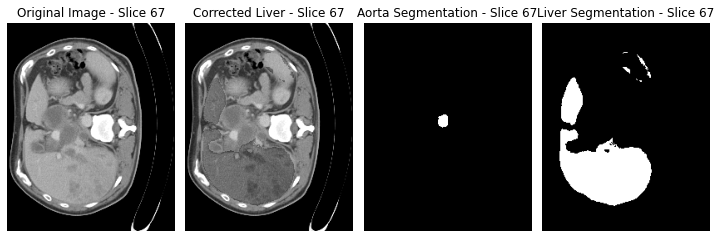

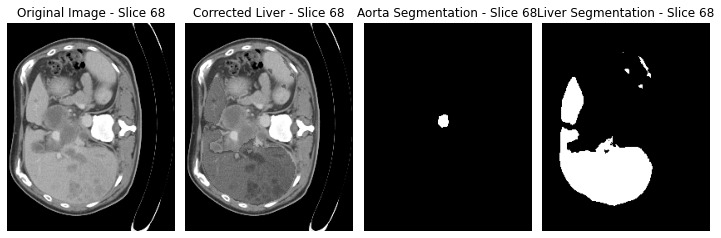

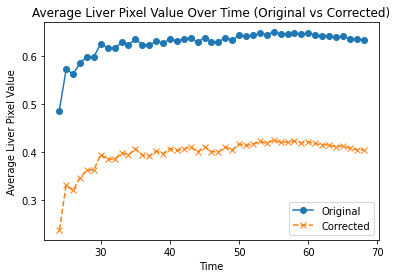

In [ ]:
# 필요한 라이브러리 불러오기
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# 메인 함수
if __name__ == '__main__':
    # 데이터 불러오기
    data = np.load('./sub_1420.npz')
    img = data['img'][0, 0, :, :, :]
    li = data['li'][0, :, :, :]
    ao = data['ao'][0, :, :, :]

    # 평균 콘트라스트 값을 저장할 리스트 초기화
    time_stamps = []
    original_liver_avg_values = []
    corrected_liver_avg_values = []

    # 이미지 슬라이스 별로 처리
    for sld in range(img.shape[-1] // 2):
        sld_img = img[:, :, sld]
        sld_li = li[:, :, sld]
        sld_ao = ao[:, :, sld]
        
        # 간 영역에 픽셀이 존재하는지 확인
        if np.any(sld_li > 0):
            # 아르타와 간 영역의 평균 픽셀 값을 계산
            aorta_avg_pixel_value = np.mean(sld_ao[sld_ao > 0])
            original_liver_avg_pixel_value = np.mean(sld_img[sld_li > 0])

            # 아르타의 평균 픽셀 값을 이용해 간 영역의 이미지를 보정
            corrected_img = np.where(sld_li > 0, sld_img * (sld_img / aorta_avg_pixel_value), sld_img)
            corrected_liver_avg_pixel_value = np.mean(corrected_img[sld_li > 0])

            # 평균 값과 시간대 저장
            time_stamps.append(sld)
            original_liver_avg_values.append(original_liver_avg_pixel_value)
            corrected_liver_avg_values.append(corrected_liver_avg_pixel_value)

            # 이미지 출력
            fig = plt.figure(1, figsize=(15, 5))
            plt.subplot(161)
            plt.imshow(sld_img, cmap='gray')
            plt.title(f'Original Image - Slice {sld}')  
            plt.axis('off')
            plt.subplot(162)
            plt.imshow(corrected_img, cmap='gray')
            plt.title(f'Corrected Liver - Slice {sld}')  
            plt.axis('off')
            plt.subplot(164)
            plt.imshow(sld_li, cmap='gray')
            plt.title(f'Liver Segmentation - Slice {sld}')  
            plt.axis('off')
            plt.subplot(163)
            plt.imshow(sld_ao, cmap='gray')
            plt.title(f'Aorta Segmentation - Slice {sld}')  
            plt.axis('off')

            plt.tight_layout()
            plt.show()
            plt.close(fig)
            plt.close('all')

    # 간 영역의 평균 픽셀값 그래프 생성
    plt.figure()
    plt.plot(time_stamps, original_liver_avg_values, marker='o', linestyle='-', label='Original')
    plt.plot(time_stamps, corrected_liver_avg_values, marker='x', linestyle='--', label='Corrected')
    plt.xlabel('Time')
    plt.ylabel('Average Liver Pixel Value')
    plt.title('Average Liver Pixel Value Over Time (Original vs Corrected)')
    plt.legend()
    plt.show()


Processed slice 49, CNR_corrected: 0.8292916417121887, CNR_original: 1.9334847927093506


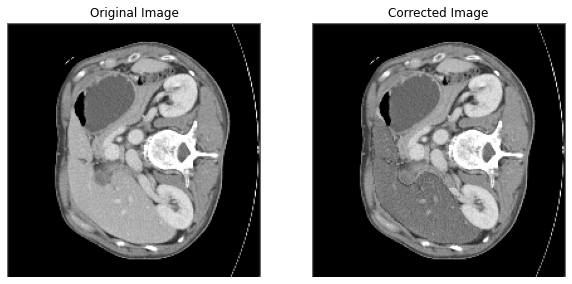

Processed slice 50, CNR_corrected: 0.6669436693191528, CNR_original: 1.9913525581359863


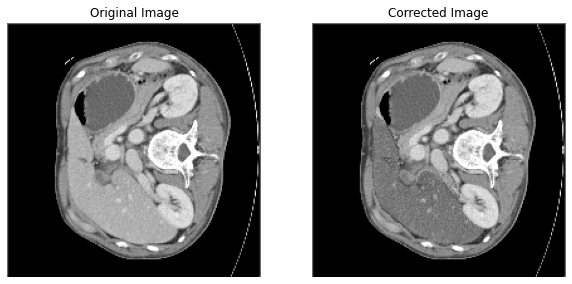

Processed slice 51, CNR_corrected: 0.6161494255065918, CNR_original: 1.9697610139846802


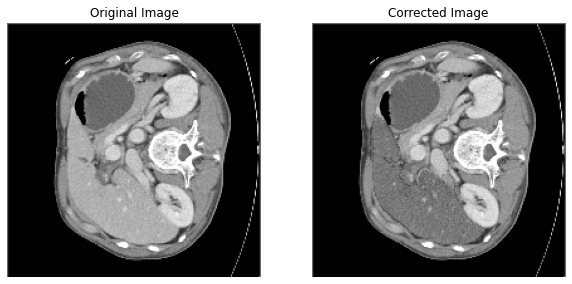

Processed slice 52, CNR_corrected: 0.5271050930023193, CNR_original: 1.7679922580718994


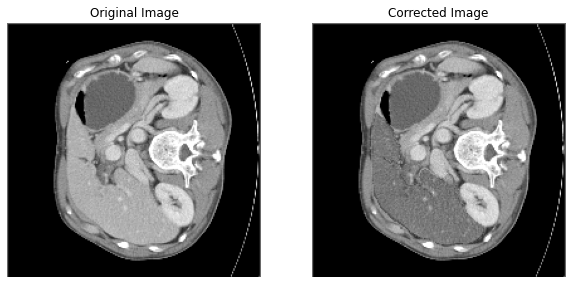

Processed slice 53, CNR_corrected: 0.4483679533004761, CNR_original: 1.6915663480758667


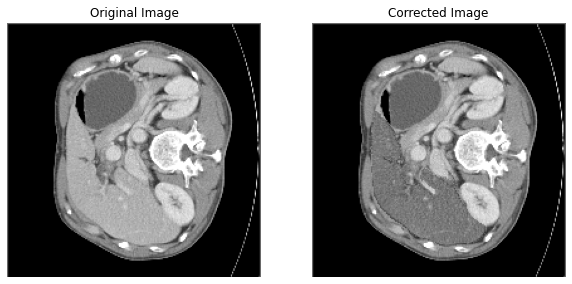

Processed slice 54, CNR_corrected: 0.40019962191581726, CNR_original: 1.6221309900283813


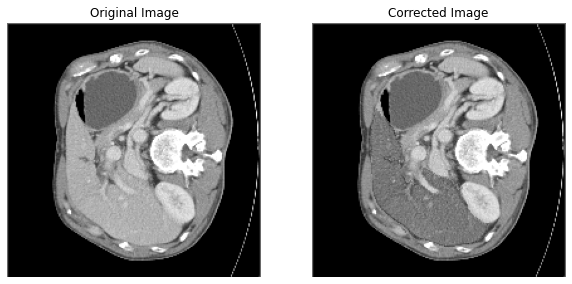

Processed slice 55, CNR_corrected: 0.3654581606388092, CNR_original: 1.590520977973938


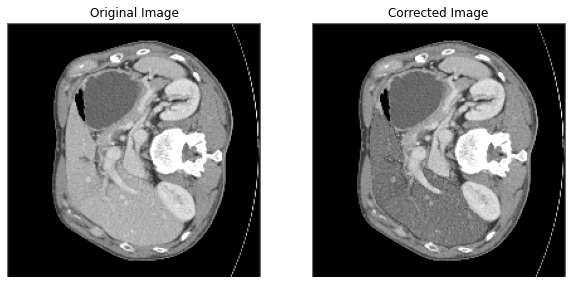

Processed slice 56, CNR_corrected: 0.34071436524391174, CNR_original: 1.5947448015213013


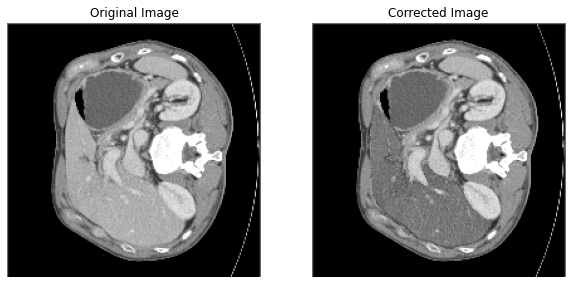

Processed slice 57, CNR_corrected: 0.34414011240005493, CNR_original: 1.6185450553894043


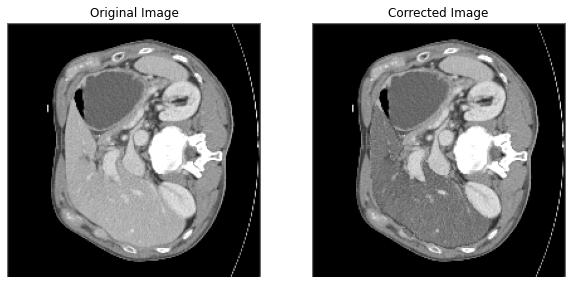

Processed slice 58, CNR_corrected: 0.3548315465450287, CNR_original: 1.6516836881637573


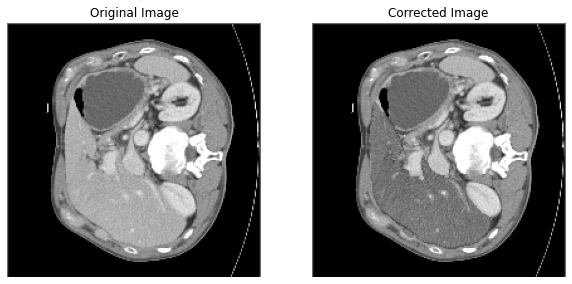

Processed slice 59, CNR_corrected: 0.37141624093055725, CNR_original: 1.6901823282241821


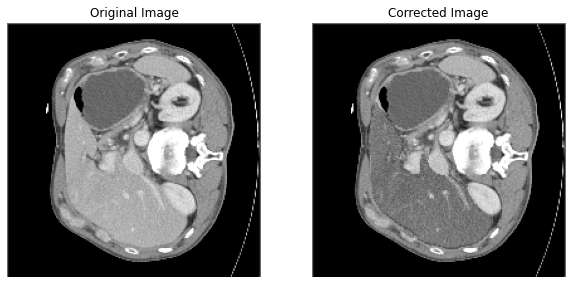

Processed slice 60, CNR_corrected: 0.3620707392692566, CNR_original: 1.6862577199935913


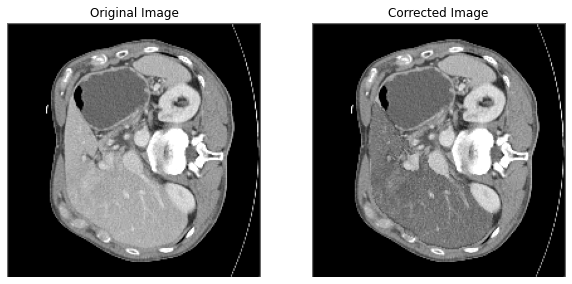

Processed slice 61, CNR_corrected: 0.3843717873096466, CNR_original: 1.771719217300415


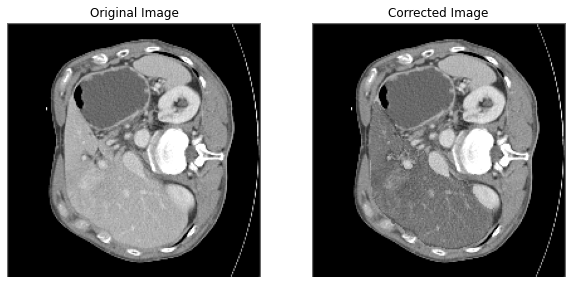

Processed slice 62, CNR_corrected: 0.42511311173439026, CNR_original: 1.8282084465026855


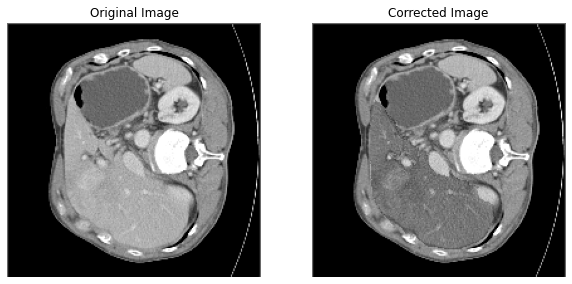

Processed slice 63, CNR_corrected: 0.40714147686958313, CNR_original: 1.8746315240859985


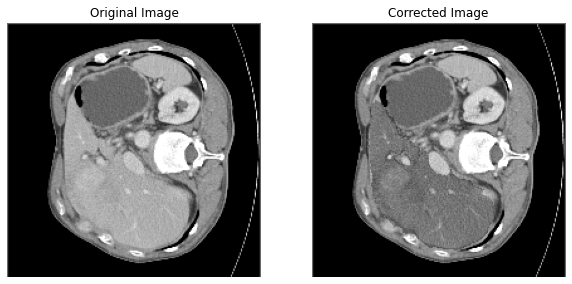

Processed slice 64, CNR_corrected: 0.36399614810943604, CNR_original: 1.8427281379699707


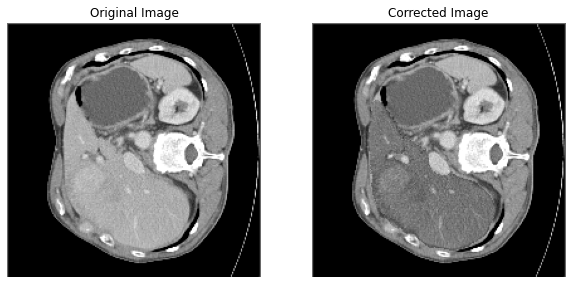

Processed slice 65, CNR_corrected: 0.32286372780799866, CNR_original: 1.833508849143982


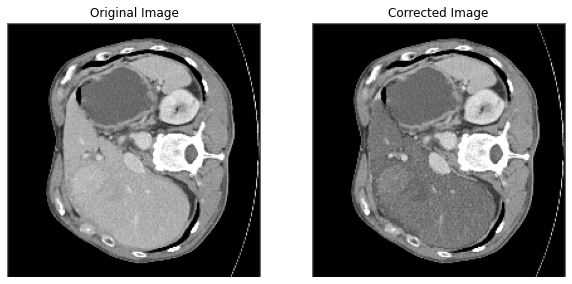

Processed slice 66, CNR_corrected: 0.39033105969429016, CNR_original: 1.8523069620132446


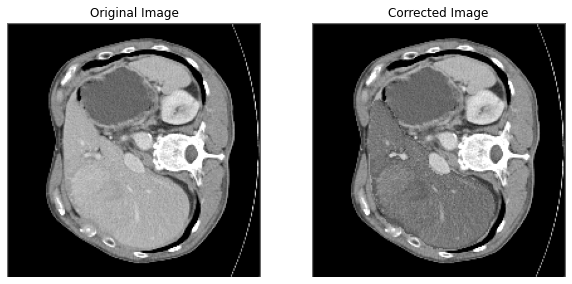

Processed slice 67, CNR_corrected: 0.33325549960136414, CNR_original: 1.7870643138885498


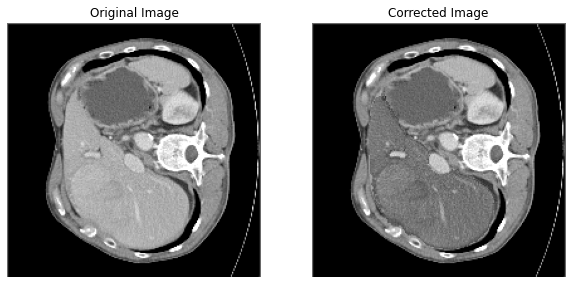

Processed slice 68, CNR_corrected: 0.3348805010318756, CNR_original: 1.785478115081787


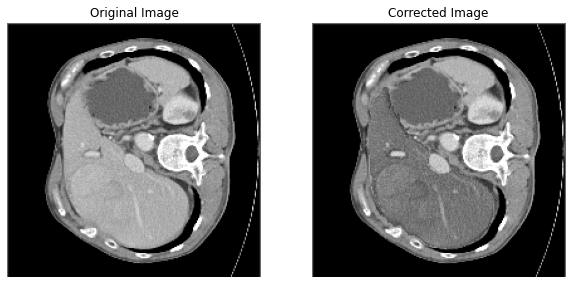

Processed slice 69, CNR_corrected: 0.3187442123889923, CNR_original: 1.7643020153045654


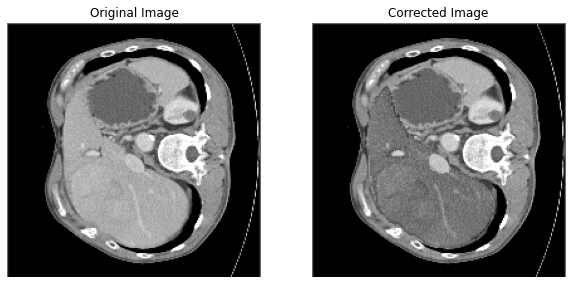

Processed slice 70, CNR_corrected: 0.3295927047729492, CNR_original: 1.6884074211120605


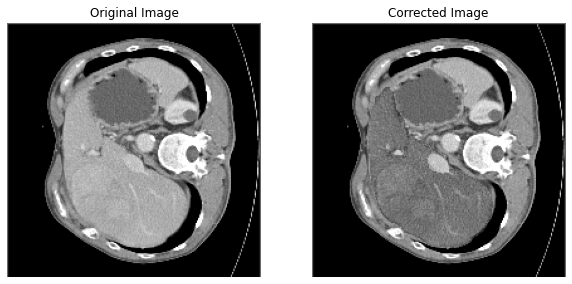

Processed slice 71, CNR_corrected: 0.3700557351112366, CNR_original: 1.8071175813674927


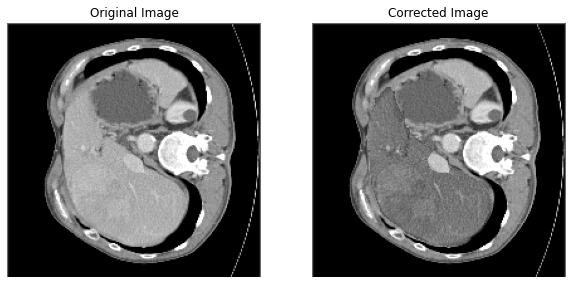

Processed slice 72, CNR_corrected: 0.4999431371688843, CNR_original: 2.0727767944335938


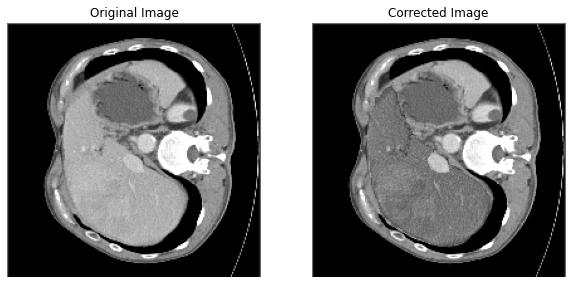

Processed slice 73, CNR_corrected: 0.47011470794677734, CNR_original: 2.768256902694702


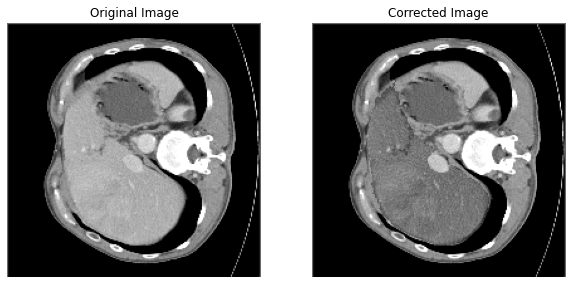

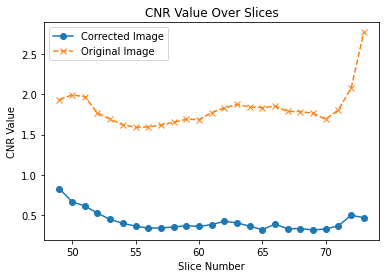

In [ ]:
#새로운 공식. 간영역에만. 산점도 이상함.시각화로 보이는 건 잘됨.
import matplotlib.pyplot as plt
import numpy as np
import nibabel as nib
from scipy.ndimage import zoom

if __name__ == '__main__':
    data = np.load('./sub_1386.npz')
    img = data['img'][0, 0, :, :, :]
    li = data['li'][0, :, :, :]
    ao = data['ao'][0, :, :, :]
    hcc_nii = nib.load('/home/hyoreek/dataset/HCC/1386_lab_.nii.gz')
    hcc = hcc_nii.get_fdata()

    CNR_values_corrected = []
    CNR_values_original = []
    time_stamps = []

    max_slice_index = min(img.shape[2], hcc.shape[2], li.shape[2]) - 1

    for sld in range(0, max_slice_index + 1):
        sld_img = img[:, :, sld]
        sld_li = li[:, :, sld]
        sld_ao = ao[:, :, sld]
        sld_hcc = hcc[:, :, sld]

        aorta_avg_value = np.mean(sld_ao[sld_ao > 0])

        sld_img_corrected = np.where(sld_li > 0, sld_img * (sld_img / aorta_avg_value), sld_img)

        if np.sum(sld_li > 0) == 0 or np.sum(sld_hcc > 0) == 0:
            continue

        if sld_img.shape != sld_hcc.shape:
            scaling_factors = [a / b for a, b in zip(sld_img.shape, sld_hcc.shape)]
            sld_hcc = zoom(sld_hcc, scaling_factors, order=1)

        # For the corrected image
        mean_liver_corrected = np.mean(sld_img_corrected[sld_li > 0])
        var_liver_corrected = np.var(sld_img_corrected[sld_li > 0])
        mean_hcc_corrected = np.mean(sld_img_corrected[sld_hcc > 0])
        var_hcc_corrected = np.var(sld_img_corrected[sld_hcc > 0])

        CNR_value_corrected = abs(mean_liver_corrected - mean_hcc_corrected) / np.sqrt(var_liver_corrected + var_hcc_corrected)
        CNR_values_corrected.append(CNR_value_corrected)

        # For the original image
        mean_liver_original = np.mean(sld_img[sld_li > 0])
        var_liver_original = np.var(sld_img[sld_li > 0])
        mean_hcc_original = np.mean(sld_img[sld_hcc > 0])
        var_hcc_original = np.var(sld_img[sld_hcc > 0])

        CNR_value_original = abs(mean_liver_original - mean_hcc_original) / np.sqrt(var_liver_original + var_hcc_original)
        CNR_values_original.append(CNR_value_original)

        time_stamps.append(sld)

        print(f"Processed slice {sld}, CNR_corrected: {CNR_value_corrected}, CNR_original: {CNR_value_original}")

        fig, axs = plt.subplots(1, 2, figsize=(10, 5))
        axs[0].imshow(sld_img, cmap='gray')
        axs[0].set_title('Original Image')
        axs[0].axis('off')

        axs[1].imshow(sld_img_corrected, cmap='gray')
        axs[1].set_title('Corrected Image')
        axs[1].axis('off')

        plt.show()

    plt.figure()
    plt.plot(time_stamps, CNR_values_corrected, marker='o', linestyle='-', label='Corrected Image')
    plt.plot(time_stamps, CNR_values_original, marker='x', linestyle='--', label='Original Image')
    plt.xlabel('Slice Number')
    plt.ylabel('CNR Value')
    plt.title('CNR Value Over Slices')
    plt.legend()
    plt.show()


# 결과적으로는 아래 코드를 사용하여 결과를 냄.

Processed slice 28, CNR_corrected: 2.053328275680542, CNR_original: 1.6885842084884644


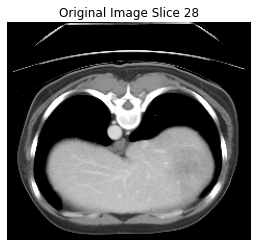

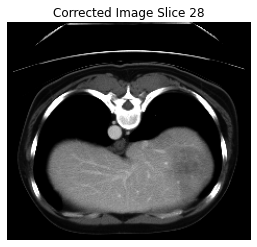

Processed slice 29, CNR_corrected: 1.6444568634033203, CNR_original: 1.4279358386993408


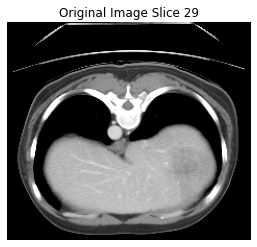

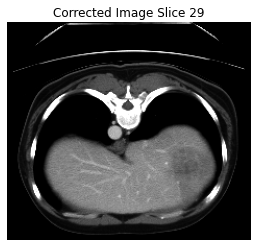

Processed slice 30, CNR_corrected: 1.1338348388671875, CNR_original: 1.1658121347427368


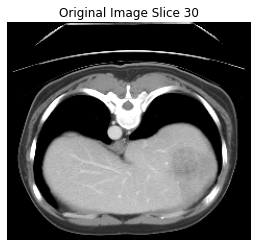

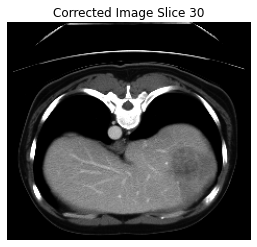

Processed slice 31, CNR_corrected: 0.8469234108924866, CNR_original: 0.9534451961517334


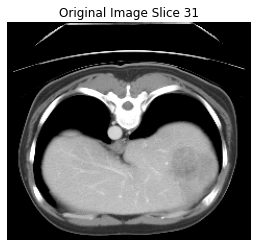

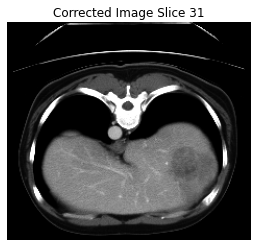

Processed slice 32, CNR_corrected: 0.9595120549201965, CNR_original: 1.0239224433898926


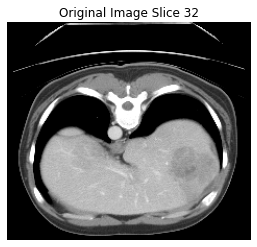

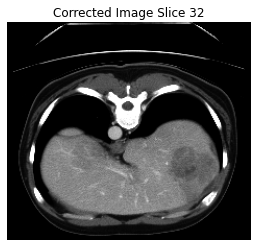

Processed slice 33, CNR_corrected: 1.1983217000961304, CNR_original: 1.157605767250061


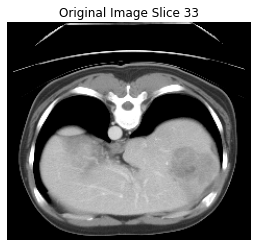

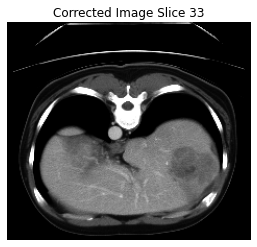

Processed slice 34, CNR_corrected: 1.5718830823898315, CNR_original: 1.355820894241333


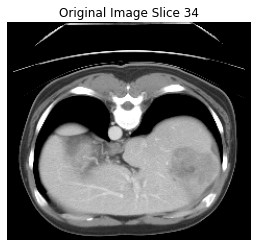

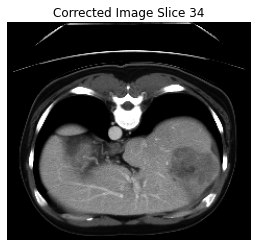

Processed slice 35, CNR_corrected: 1.8749768733978271, CNR_original: 1.5354338884353638


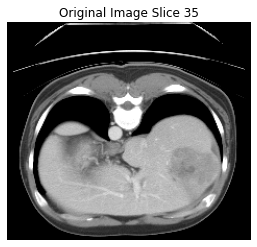

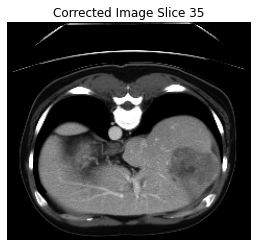

Processed slice 36, CNR_corrected: 2.0477099418640137, CNR_original: 1.6721324920654297


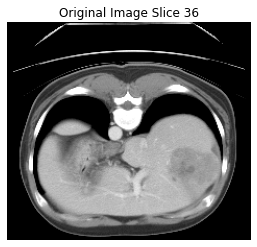

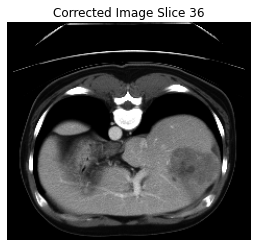

Processed slice 37, CNR_corrected: 2.0394670963287354, CNR_original: 1.6565073728561401


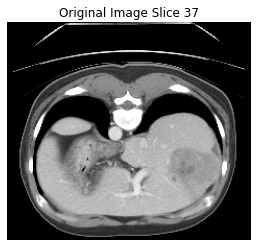

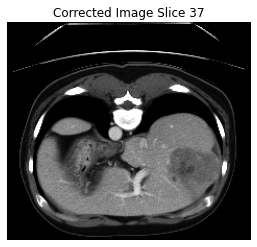

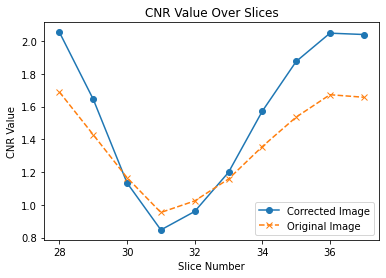

In [68]:
#전체영역에 새로운 공식을 적용. #결과적으로 이걸 사용함. 시각화 #전체슬라이드
import matplotlib.pyplot as plt
import numpy as np
import nibabel as nib
from scipy.ndimage import zoom

if __name__ == '__main__':
    data = np.load('./sub_1363.npz')
    img = data['img'][0, 0, :, :, :]
    li = data['li'][0, :, :, :]
    ao = data['ao'][0, :, :, :]
    hcc_nii = nib.load('/home/hyoreek/dataset/HCC/1363_lab_.nii.gz')
    hcc = hcc_nii.get_fdata()

    CNR_values_corrected = []
    CNR_values_original = []
    time_stamps = []

    max_slice_index = min(img.shape[2], hcc.shape[2], li.shape[2]) - 1

    for sld in range(0, max_slice_index + 1):
        sld_img = img[:, :, sld]
        sld_li = li[:, :, sld]
        sld_ao = ao[:, :, sld]
        sld_hcc = hcc[:, :, sld]

        aorta_avg_value = np.mean(sld_ao[sld_ao > 0])

        # Updated contrast correction formula for the entire image
        sld_img_corrected = sld_img * (sld_img / aorta_avg_value)

        if np.sum(sld_li > 0) == 0 or np.sum(sld_hcc > 0) == 0:
            continue

        if sld_img.shape != sld_hcc.shape:
            scaling_factors = [a / b for a, b in zip(sld_img.shape, sld_hcc.shape)]
            sld_hcc = zoom(sld_hcc, scaling_factors, order=1)

        # For the corrected image
        mean_liver_corrected = np.mean(sld_img_corrected[sld_li > 0])
        var_liver_corrected = np.var(sld_img_corrected[sld_li > 0])
        mean_hcc_corrected = np.mean(sld_img_corrected[sld_hcc > 0])
        var_hcc_corrected = np.var(sld_img_corrected[sld_hcc > 0])

        CNR_value_corrected = abs(mean_liver_corrected - mean_hcc_corrected) / np.sqrt(var_liver_corrected + var_hcc_corrected)
        CNR_values_corrected.append(CNR_value_corrected)

        # For the original image
        mean_liver_original = np.mean(sld_img[sld_li > 0])
        var_liver_original = np.var(sld_img[sld_li > 0])
        mean_hcc_original = np.mean(sld_img[sld_hcc > 0])
        var_hcc_original = np.var(sld_img[sld_hcc > 0])

        CNR_value_original = abs(mean_liver_original - mean_hcc_original) / np.sqrt(var_liver_original + var_hcc_original)
        CNR_values_original.append(CNR_value_original)

        time_stamps.append(sld)

        print(f"Processed slice {sld}, CNR_corrected: {CNR_value_corrected}, CNR_original: {CNR_value_original}")

        # Plot and save the original image
        plt.imshow(sld_img, cmap='gray')
        plt.title(f'Original Image Slice {sld}')
        plt.axis('off')
        plt.savefig(f'Original_Image_Slice_{sld}.png')
        plt.show()

        # Plot and save the corrected image
        plt.imshow(sld_img_corrected, cmap='gray')
        plt.title(f'Corrected Image Slice {sld}')
        plt.axis('off')
        plt.savefig(f'Corrected_Image_Slice_{sld}.png')
        plt.show()

    # Plotting the CNR values over slices
    plt.figure()
    plt.plot(time_stamps, CNR_values_corrected, marker='o', linestyle='-', label='Corrected Image')
    plt.plot(time_stamps, CNR_values_original, marker='x', linestyle='--', label='Original Image')
    plt.xlabel('Slice Number')
    plt.ylabel('CNR Value')
    plt.title('CNR Value Over Slices')
    plt.legend()
    plt.show()


In [14]:
print("Shape of sld_img:", sld_img.shape)
print("Shape of sld_hcc:", sld_hcc.shape)


Shape of sld_img: (251, 202)
Shape of sld_hcc: (512, 512)
